In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Final_Data.txt', sep='\t')
df.head()

,npi,nppes_provider_gender,specialty_description,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,ge65_suppress_flag,...,country,state,nppes_credentials,total_30_day_per_claim,drug_cost_per_claim,day_supply_per_claim,female_count,male_count,nondual_count,dual_count
0,1770515488,M,Physical Medicine,E,629.0,654.0,44696.90,15538.0,204.0,not_suppressed,...,US,NY,Optometrist,1.039746,71.060254,24.702703,not suppressed,not suppressed,not suppressed,not suppressed
1,1174060784,F,Nurse,E,673.0,727.0,25846.34,19758.0,65.0,not_suppressed,...,US,NY,Nurse,1.080238,38.404666,29.358098,not suppressed,not suppressed,not suppressed,not suppressed
2,1265525273,M,Optometry/Ophthalmology,E,9103.0,10068.9,334417.10,257126.0,1481.0,not_suppressed,...,US,AT,Medical Doctor,1.106108,36.737021,28.246292,not suppressed,not suppressed,not suppressed,not suppressed
3,1306821152,M,Cardiologist,E,1359.0,3290.3,89341.59,98467.0,288.0,not_suppressed,...,US,NY,Medical Doctor,2.421118,65.740684,72.455482,not suppressed,not suppressed,not suppressed,not suppressed
4,1134244007,F,Internal Medicine,E,53.0,53.2,3391.01,579.0,25.0,counter suppressed,...,US,FL,Medical Doctor,1.003774,63.981321,10.924528,suppressed,suppressed,suppressed,suppressed


In [3]:
df.shape

(5000, 75)

In [4]:
df.columns

Index(['npi', 'nppes_provider_gender', 'specialty_description',
       'medicare_prvdr_enroll_status', 'total_claim_count',
       'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply',
       'bene_count', 'ge65_suppress_flag', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_drug_cost_ge65',
       'total_day_supply_ge65', 'bene_count_ge65_suppress_flag',
       'bene_count_ge65', 'brand_suppress_flag', 'brand_claim_count',
       'brand_drug_cost', 'generic_suppress_flag', 'generic_claim_count',
       'generic_drug_cost', 'other_suppress_flag', 'other_claim_count',
       'other_drug_cost', 'mapd_suppress_flag', 'mapd_claim_count',
       'mapd_drug_cost', 'pdp_suppress_flag', 'pdp_claim_count',
       'pdp_drug_cost', 'lis_suppress_flag', 'lis_claim_count',
       'lis_drug_cost', 'nonlis_suppress_flag', 'nonlis_claim_count',
       'nonlis_drug_cost', 'opioid_claim_count', 'opioid_drug_cost',
       'opioid_day_supply', 'opioid_bene_count', 'opio

In [5]:
print(df.dtypes)

npi                                   int64
nppes_provider_gender                object
specialty_description                object
medicare_prvdr_enroll_status         object
total_claim_count                   float64
total_30_day_fill_count             float64
total_drug_cost                     float64
total_day_supply                    float64
bene_count                          float64
ge65_suppress_flag                   object
total_claim_count_ge65              float64
total_30_day_fill_count_ge65        float64
total_drug_cost_ge65                float64
total_day_supply_ge65               float64
bene_count_ge65_suppress_flag        object
bene_count_ge65                     float64
brand_suppress_flag                  object
brand_claim_count                   float64
brand_drug_cost                     float64
generic_suppress_flag                object
generic_claim_count                 float64
generic_drug_cost                   float64
other_suppress_flag             

In [6]:
df['exclusion_flag'] = df['exclusion_flag'].replace({1: 'excluded', 0: 'not excluded'})

In [7]:
df['exclusion_flag'].value_counts()

not excluded    4535
excluded         465
Name: exclusion_flag, dtype: int64

## Exploring distribution of continuous variables 

Focusing on groupings of variables and their correlations to each other

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B5A926E48>,
      dtype=object)

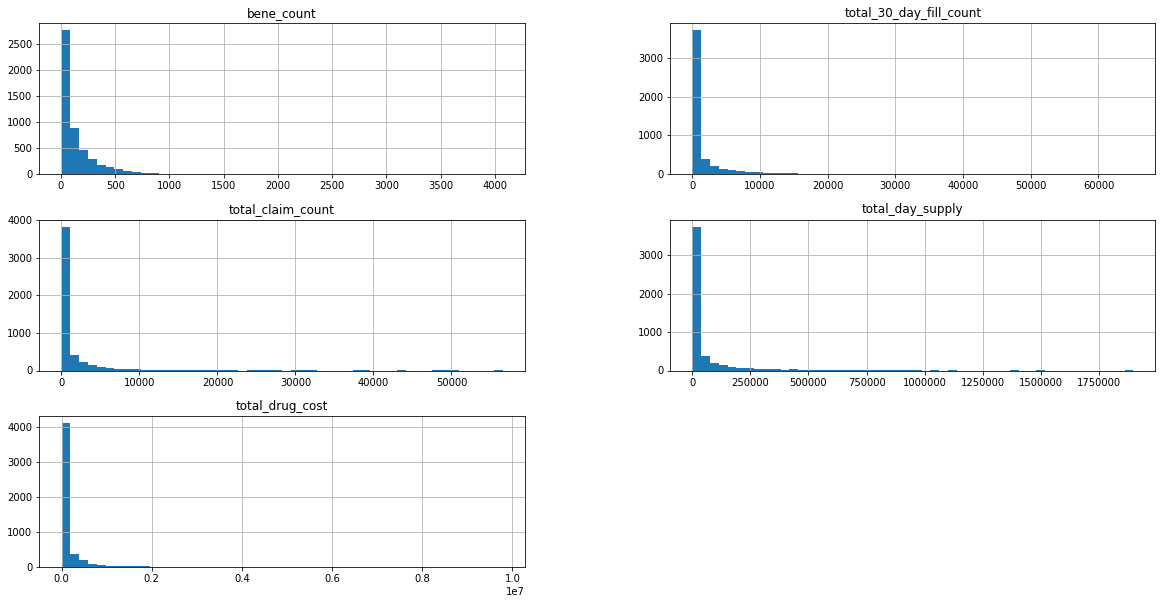

In [8]:
#Creating set of features and looking more closely at them: starting with ge65 features
kf = ['total_claim_count', 'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply', 'bene_count']
df[kf].hist(figsize=(20,10), bins=50) 

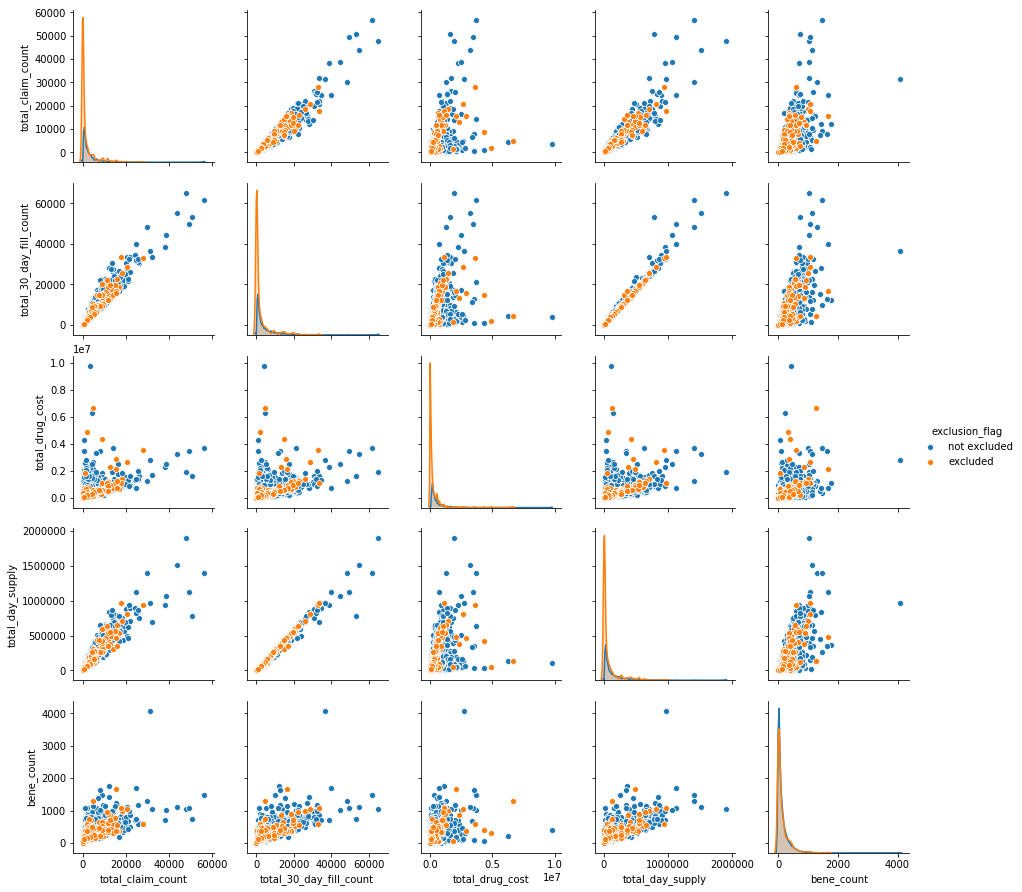

In [9]:
kf_outcome = ['total_claim_count', 'total_30_day_fill_count', 'total_drug_cost', 'total_day_supply', 'bene_count', 'exclusion_flag']
g = sns.pairplot(df[kf_outcome], hue='exclusion_flag')
plt.show()

As found during initial visualization of the data, total_claim_count is highly correlated with multiple of these features so created new columns so that all of these variables are divided by the total_claim_count so they are the average per claim. Did not do with beneficiaries as this would be the opposite relationship - one benificary can have multiple claims so will create that variable now and look at their distributions.

In [10]:
#Creating column with the average number of claims per beneficiary
df['claims_per_bene'] = df['total_claim_count'] / df['bene_count']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B5E393248>,
      dtype=object)

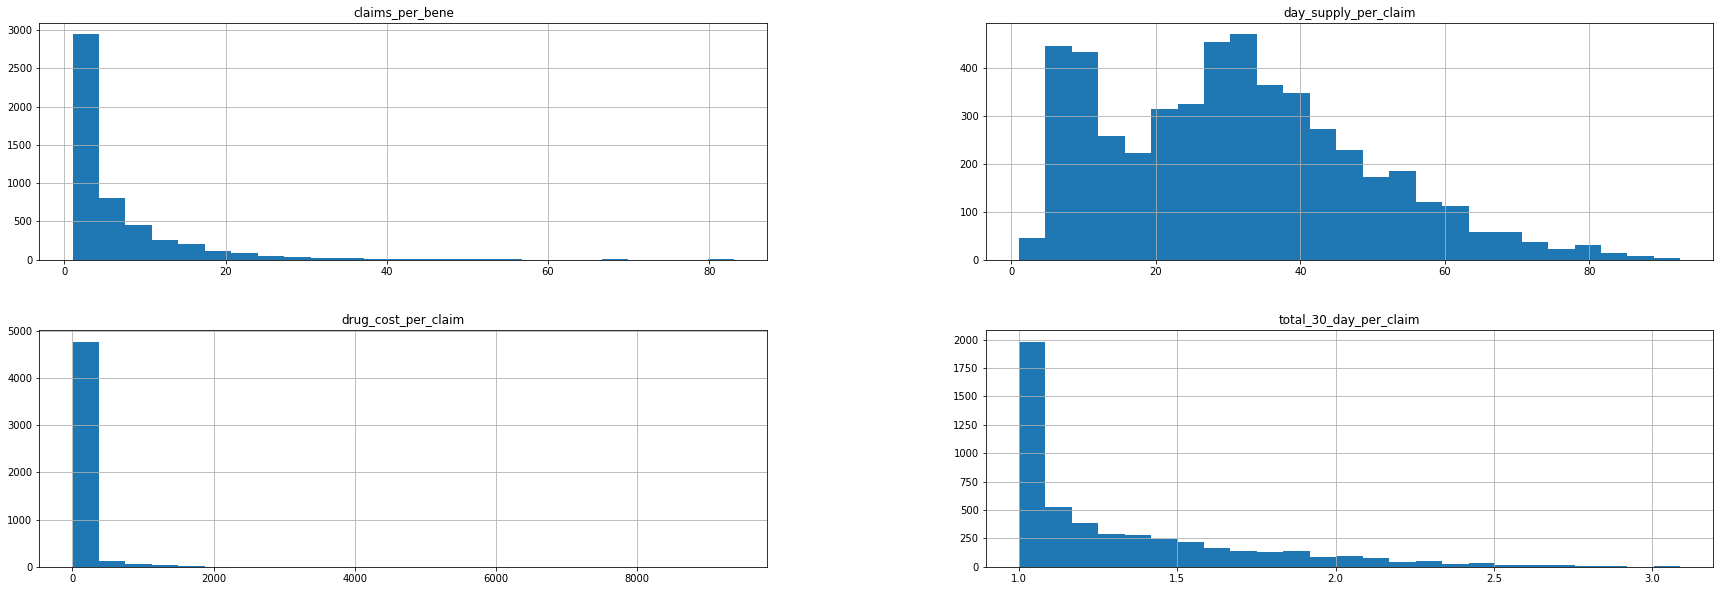

In [11]:
#Exploring relationship with all of these created variables
per = ['total_30_day_per_claim', 'drug_cost_per_claim', 'day_supply_per_claim', 'claims_per_bene']
df[per].hist(figsize=(30,10), bins = 25)

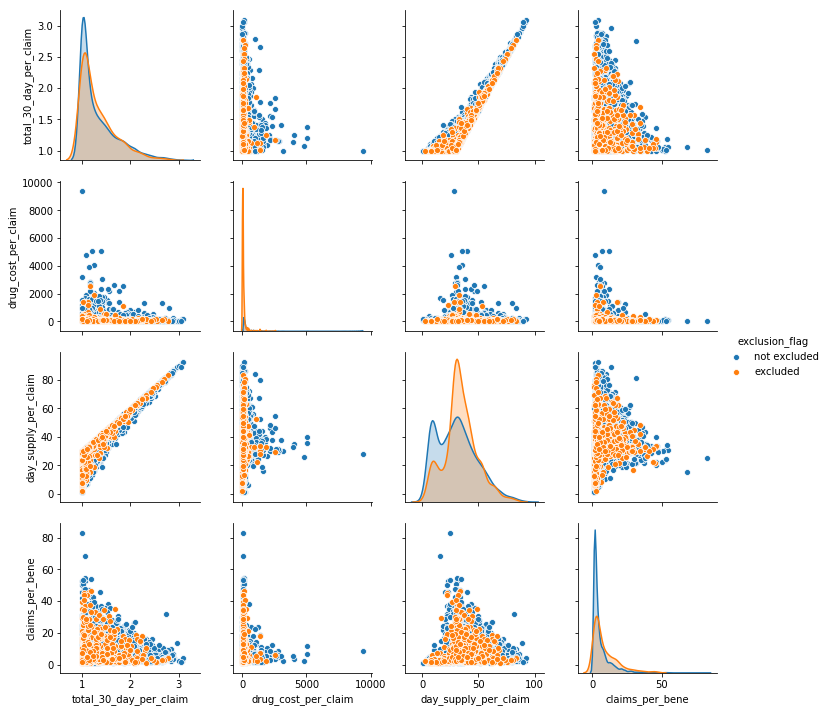

In [12]:
per_outcome = ['total_30_day_per_claim', 'drug_cost_per_claim', 'day_supply_per_claim', 'claims_per_bene', 'exclusion_flag']
g = sns.pairplot(df[per_outcome], hue='exclusion_flag')
plt.show()

total_30_day_per_claim and day_supply_per_claim are highly correlated so will probably only want to run one in our model. 

Next, looking at the ge65 variables:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B60865F48>,
      dtype=object)

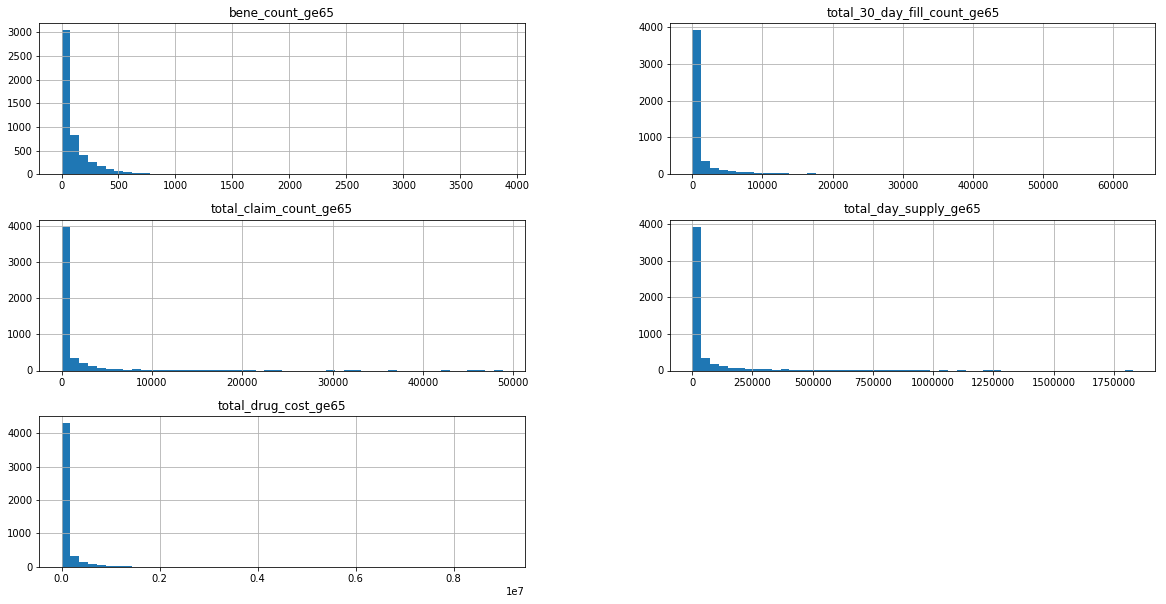

In [13]:
#Creating ge65 category and looking at these more closely
ge65 = ['total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65']
df[ge65].hist(figsize=(20,10), bins=50) 

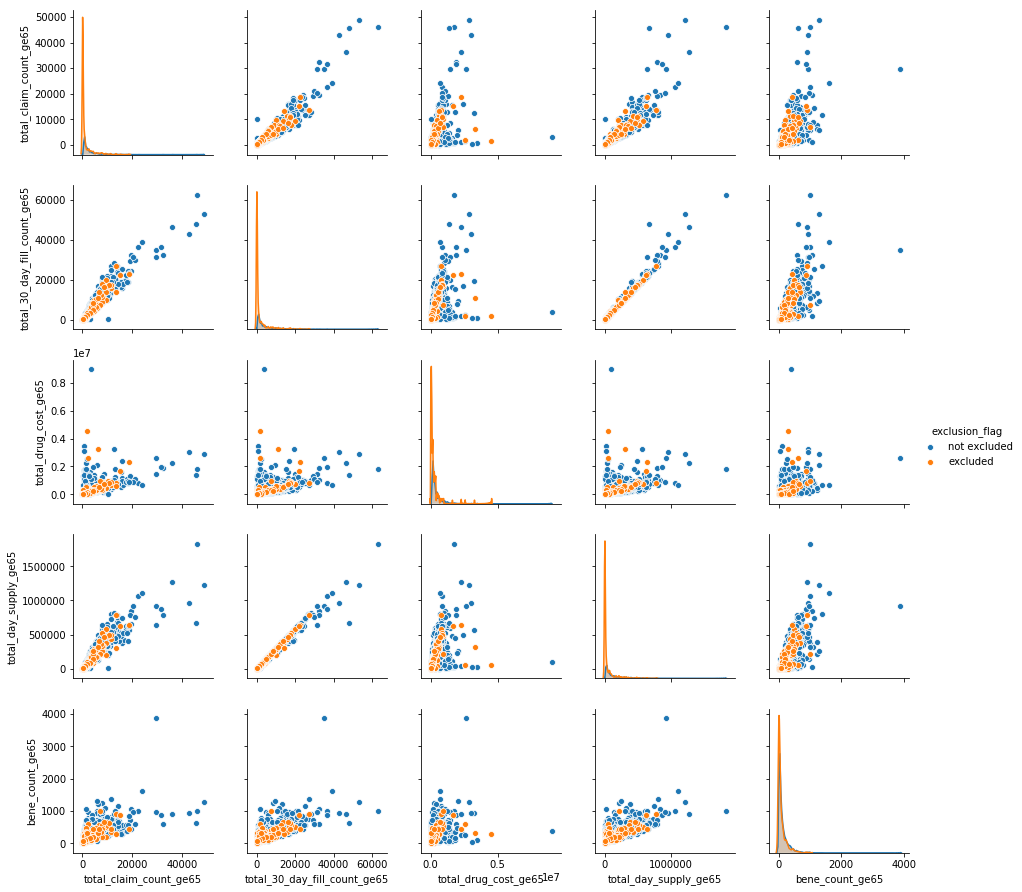

In [14]:
ge65_outcome = ['total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'total_drug_cost_ge65', 'total_day_supply_ge65', 'bene_count_ge65', 'exclusion_flag']
g = sns.pairplot(df[ge65_outcome], hue='exclusion_flag')
plt.show()

Similar to the generic values for these, both day supply and 30 day fill count are highly correlated with claim count and each other. Therefore, will also create new features for these as a per claim count.

In [15]:
#Creating per claim count for each and a per beneficiary but need to account that some denominators would be 0
df['ge65_30day_fill_per_claim'] = np.where(df['total_claim_count_ge65'] != 0, df['total_30_day_fill_count_ge65']/df['total_claim_count_ge65'], df['total_30_day_fill_count_ge65'])
df['ge65_day_supply_per_claim'] = np.where(df['total_claim_count_ge65'] != 0, df['total_day_supply_ge65']/df['total_claim_count_ge65'], df['total_day_supply_ge65'])
df['ge65_drug_cost_per_claim'] = np.where(df['total_claim_count_ge65'] != 0, df['total_drug_cost_ge65']/df['total_claim_count_ge65'], df['total_drug_cost_ge65'])
df['ge65_claims_per_bene'] = np.where(df['bene_count_ge65'] != 0, df['total_claim_count_ge65']/df['bene_count_ge65'], df['total_claim_count_ge65'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B5D3643C8>,
      dtype=object)

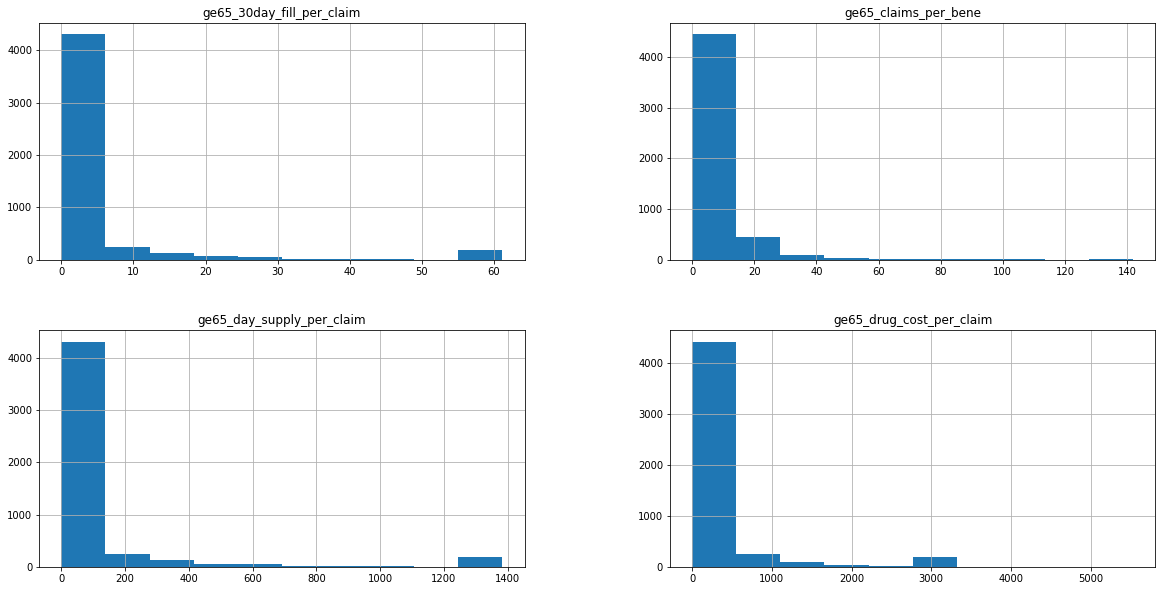

In [16]:
#Looking at new variables
new_ge65 = ['ge65_30day_fill_per_claim', 'ge65_day_supply_per_claim', 'ge65_drug_cost_per_claim', 'ge65_claims_per_bene']
df[new_ge65].hist(figsize=(20, 10))

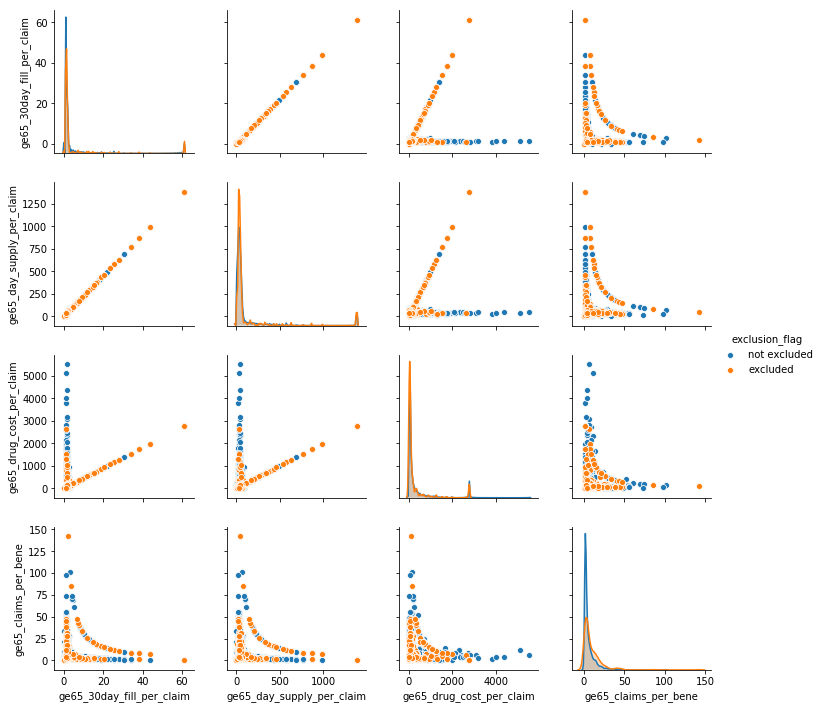

In [17]:
new_ge65_outcome = ['ge65_30day_fill_per_claim', 'ge65_day_supply_per_claim', 'ge65_drug_cost_per_claim', 'ge65_claims_per_bene', 'exclusion_flag']
g = sns.pairplot(df[new_ge65_outcome], hue='exclusion_flag')
plt.show()

# Exploring the brands vs generic vs other continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B62127548>,
      dtype=object)

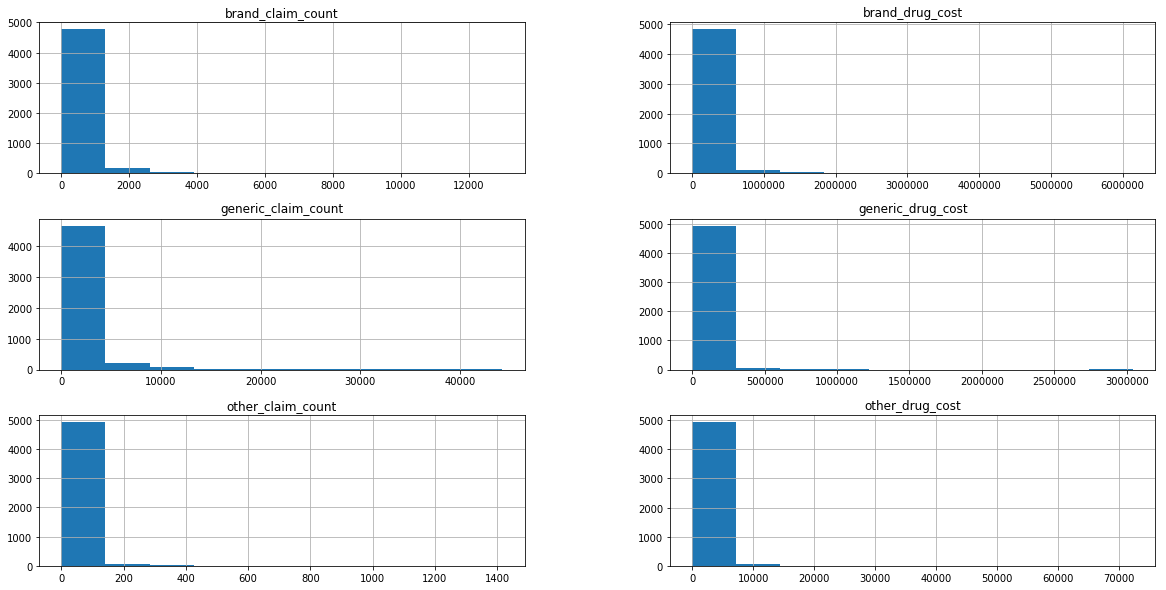

In [18]:
drug = ['brand_claim_count', 'brand_drug_cost', 'other_claim_count', 'other_drug_cost', 'generic_claim_count', 'generic_drug_cost']
df[drug].hist(figsize=(20,10))

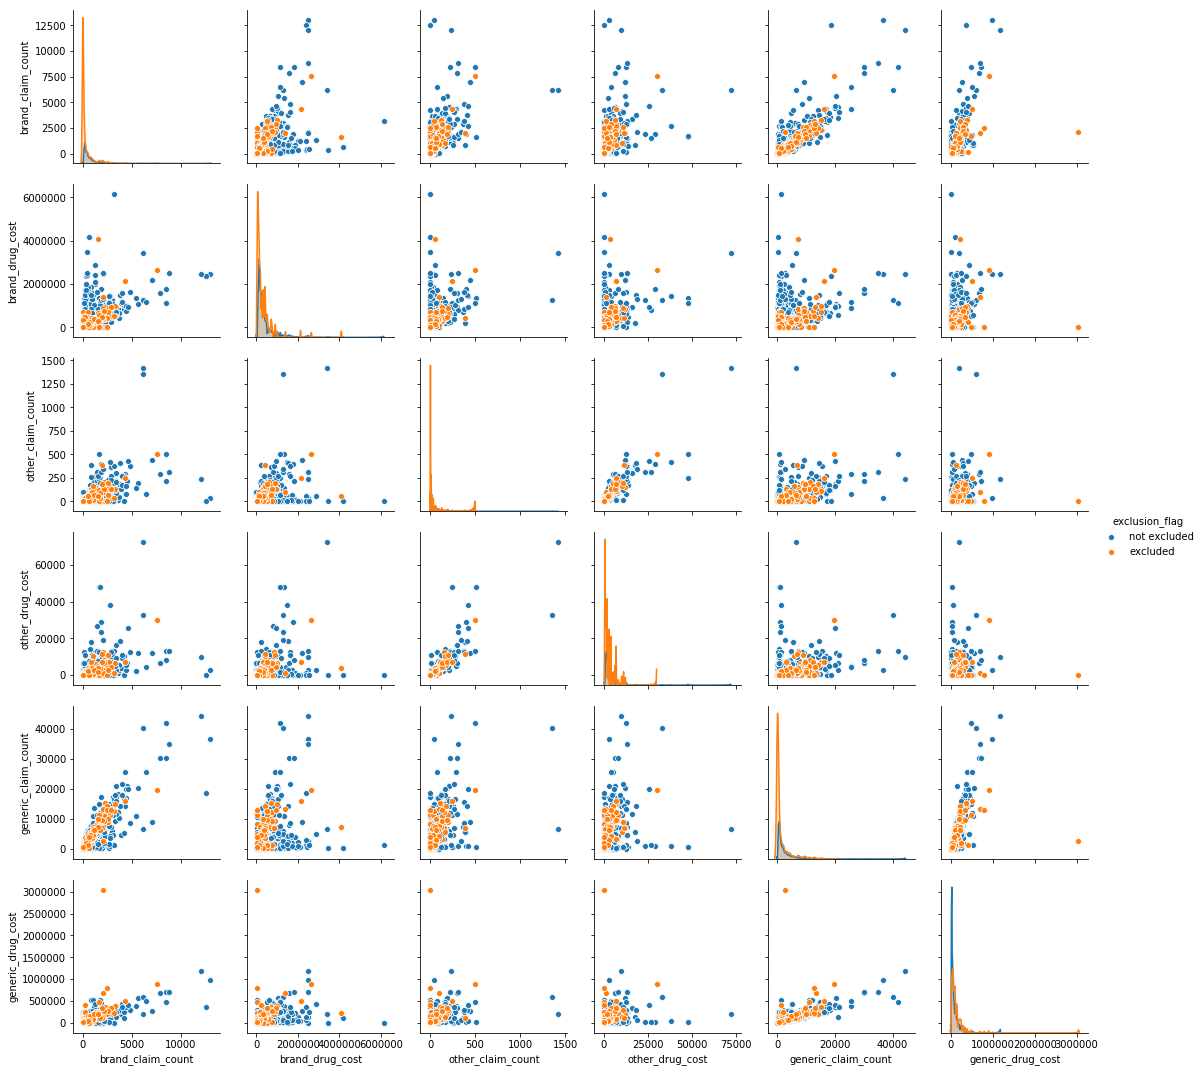

In [19]:
drug_outcome = ['brand_claim_count', 'brand_drug_cost', 'other_claim_count', 'other_drug_cost', 'generic_claim_count', 'generic_drug_cost', 'exclusion_flag']
g = sns.pairplot(df[drug_outcome], hue='exclusion_flag')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B6256E908>,
      dtype=object)

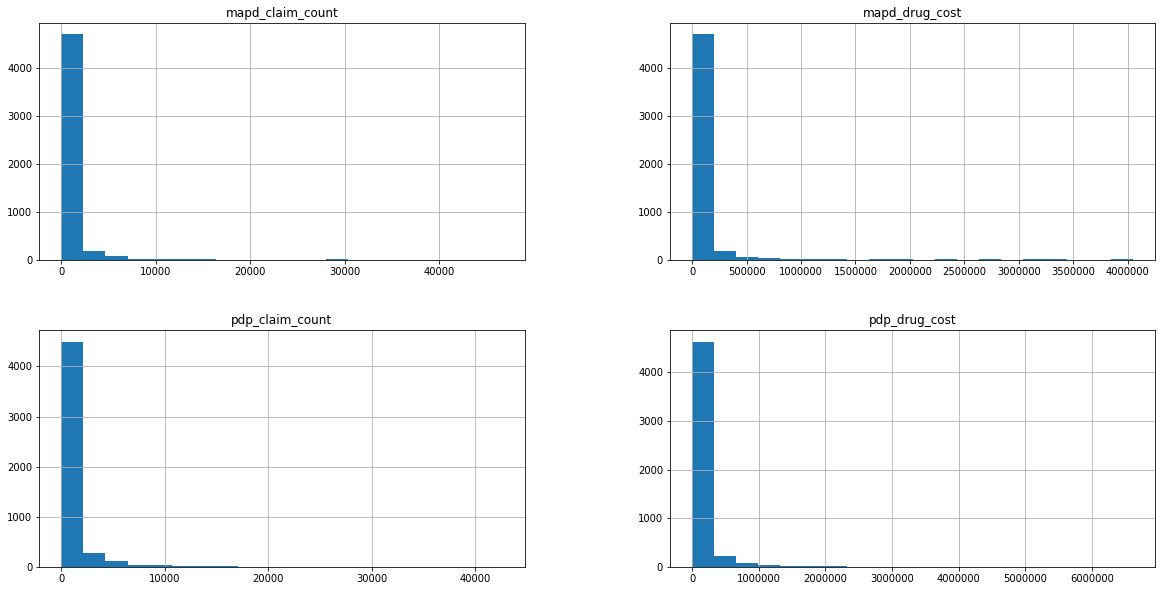

In [20]:
#Focusing on pdp and mapd
plans = ['mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count','pdp_drug_cost']
df[plans].hist(figsize=(20,10), bins=20)

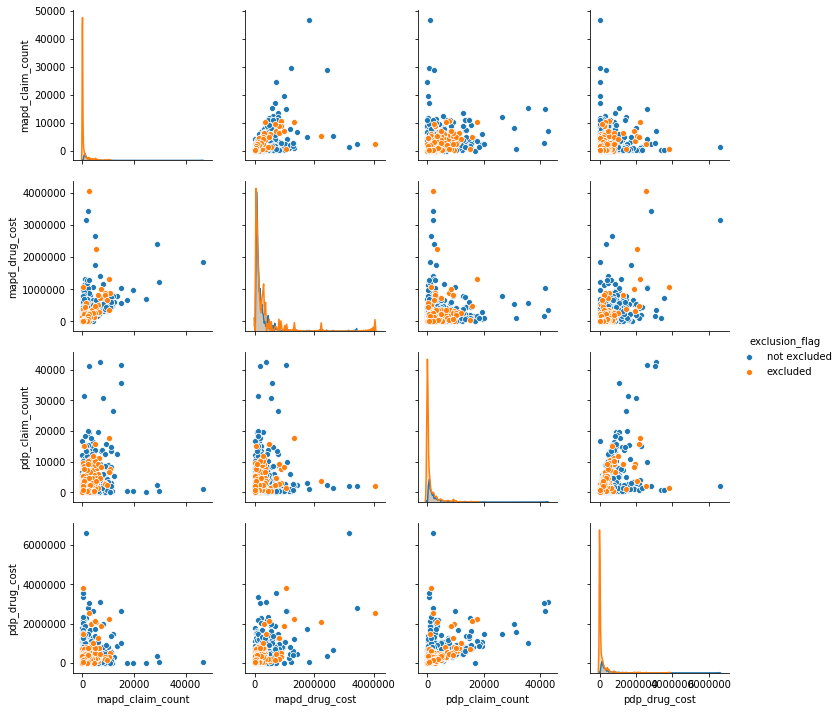

In [21]:
plans_outcome = ['mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count','pdp_drug_cost', 'exclusion_flag']
g = sns.pairplot(df[plans_outcome], hue='exclusion_flag')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B5D112A08>,
      dtype=object)

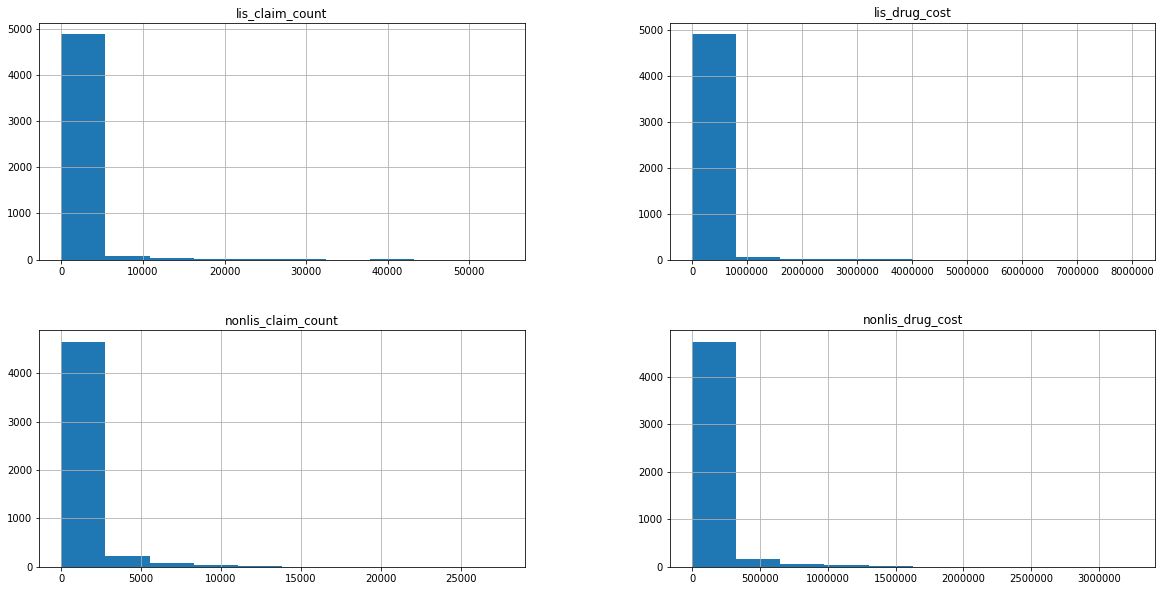

In [22]:
low_income = ['lis_claim_count', 'lis_drug_cost', 'nonlis_claim_count', 'nonlis_drug_cost']
df[low_income].hist(figsize=(20,10))

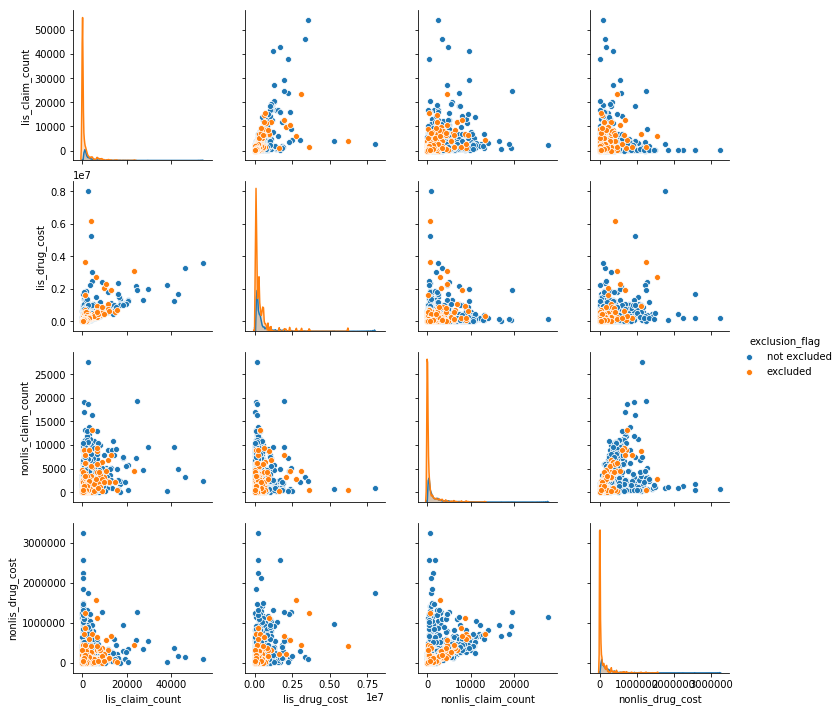

In [23]:
low_income_outcome = ['lis_claim_count', 'lis_drug_cost', 'nonlis_claim_count', 'nonlis_drug_cost', 'exclusion_flag']
g = sns.pairplot(df[low_income_outcome], hue='exclusion_flag')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B6262C208>,
      dtype=object)

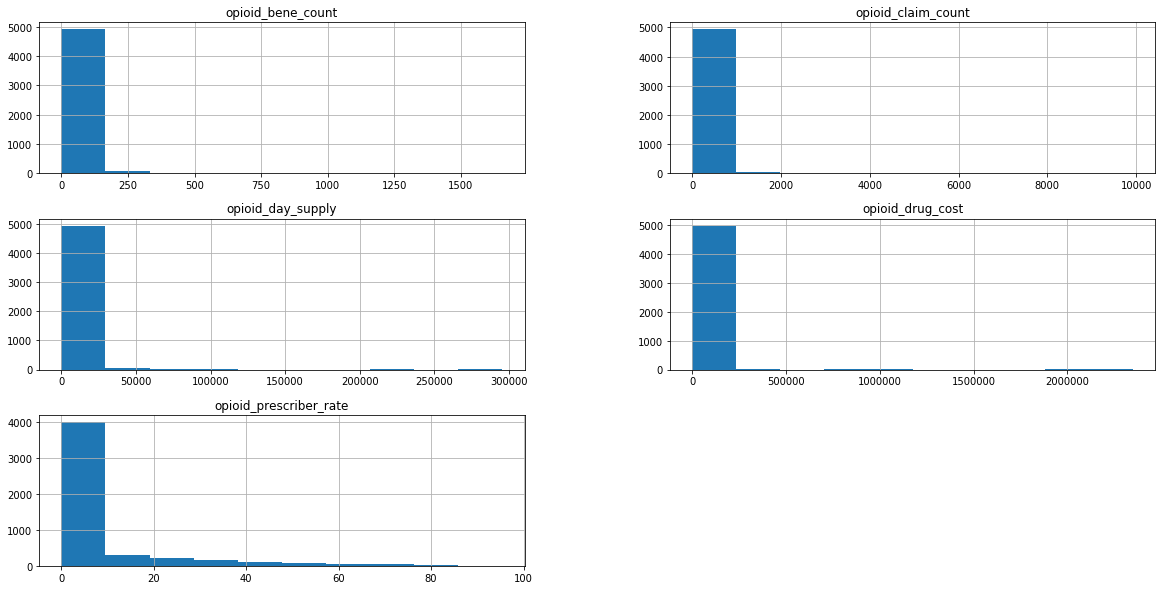

In [24]:
opioid = ['opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate']
df[opioid].hist(figsize=(20,10))

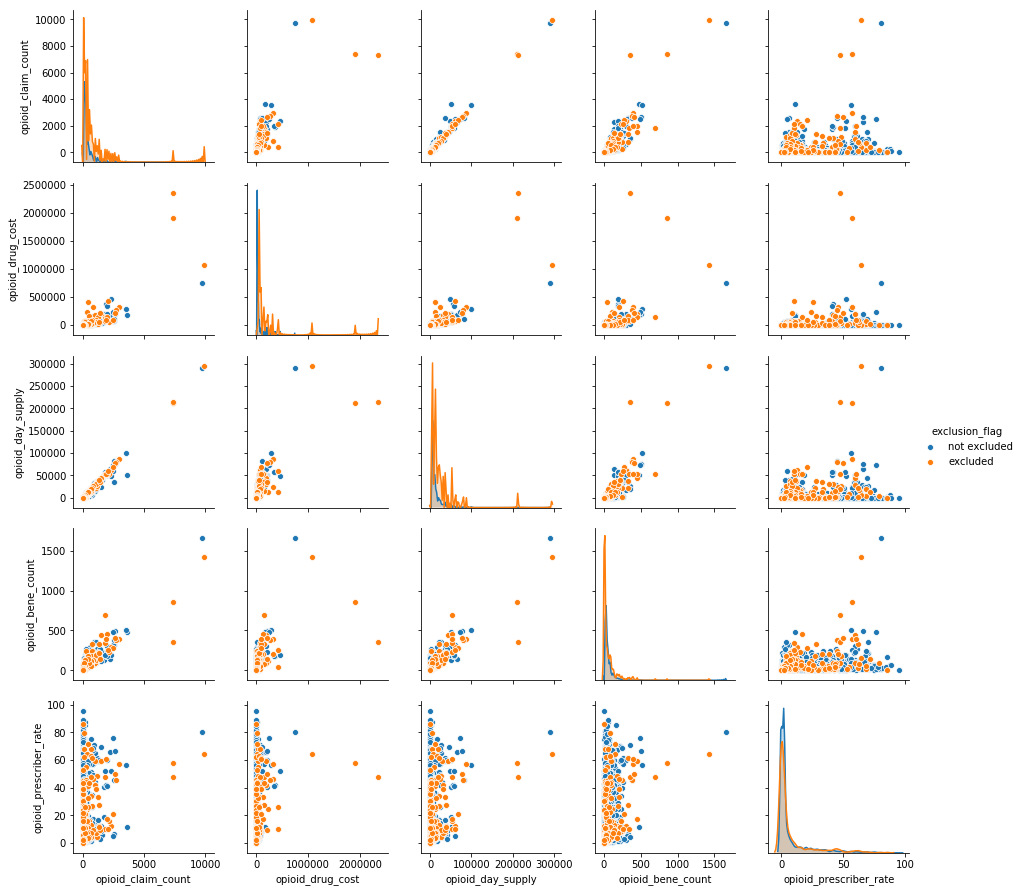

In [25]:
opioid_outcome = ['opioid_claim_count', 'opioid_drug_cost', 'opioid_day_supply', 'opioid_bene_count', 'opioid_prescriber_rate', 'exclusion_flag']
g = sns.pairplot(df[opioid_outcome], hue='exclusion_flag')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B5D120188>,
      dtype=object)

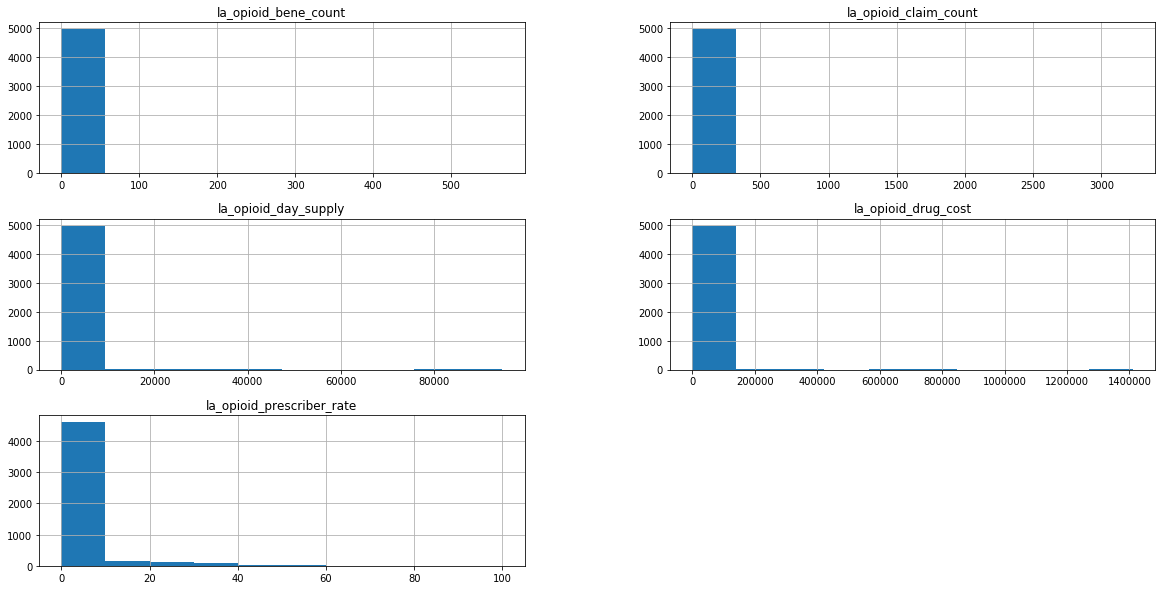

In [26]:
la_opioid = ['la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_opioid_prescriber_rate']
df[la_opioid].hist(figsize = (20,10))

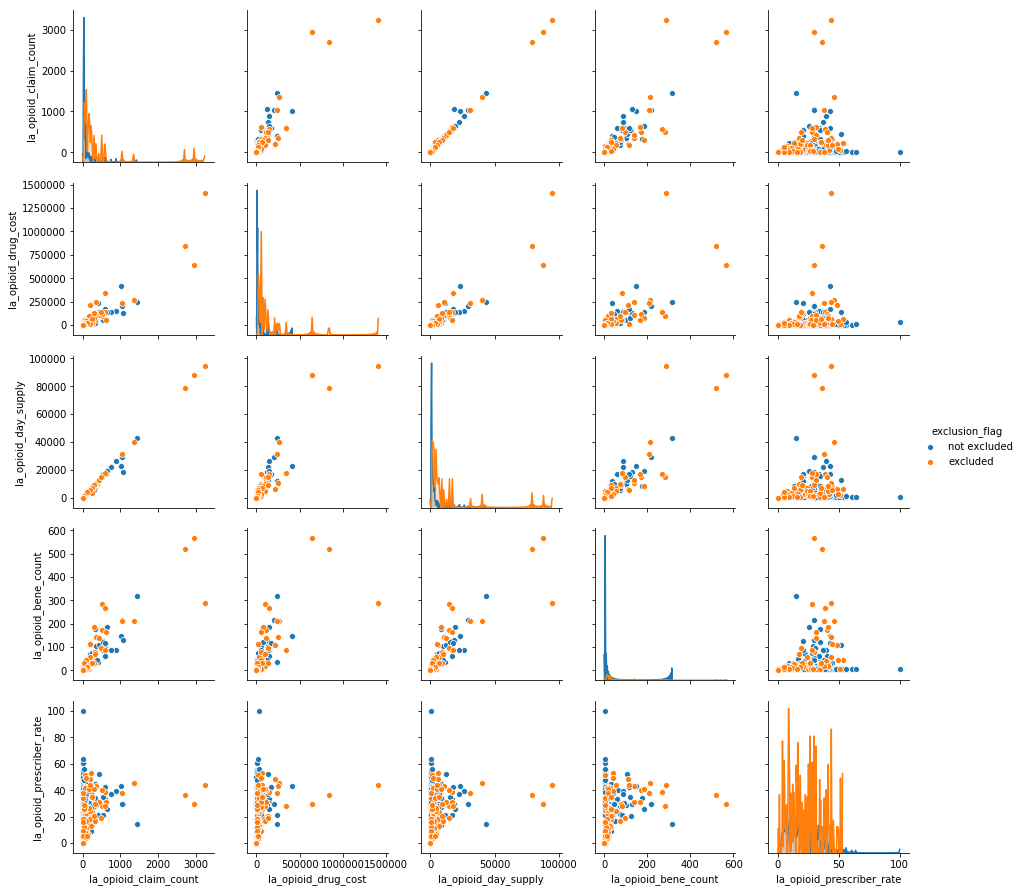

In [27]:
la_opioid_outcome = ['la_opioid_claim_count', 'la_opioid_drug_cost', 'la_opioid_day_supply', 'la_opioid_bene_count', 'la_opioid_prescriber_rate', 'exclusion_flag']
g = sns.pairplot(df[la_opioid_outcome], hue='exclusion_flag')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B5EC45148>,
      dtype=object)

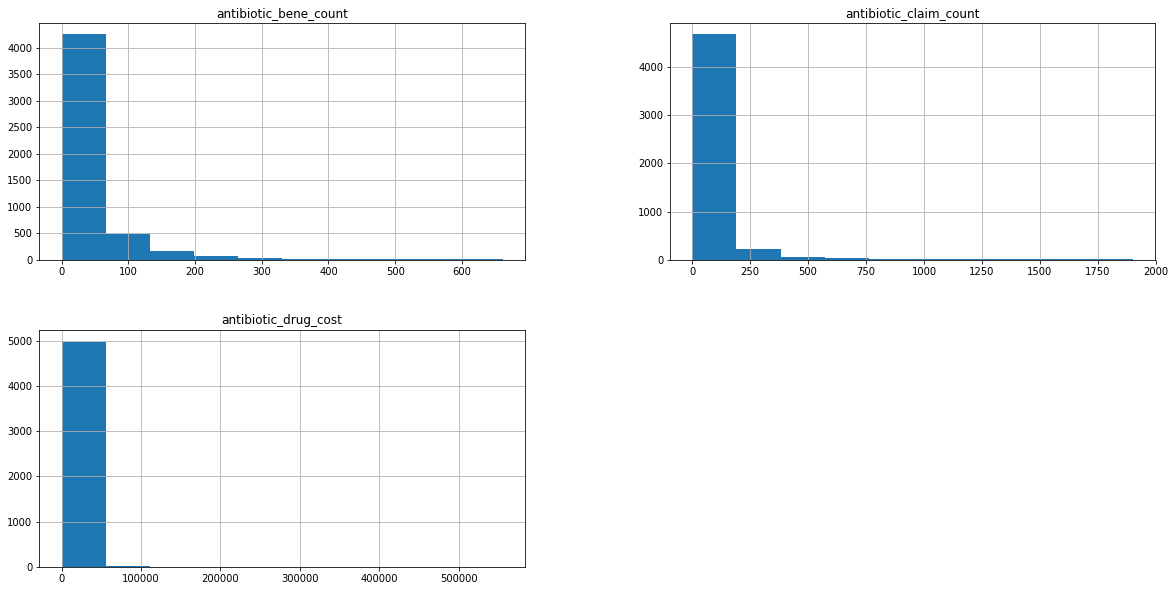

In [28]:
antibiotic = ['antibiotic_claim_count', 'antibiotic_drug_cost', 'antibiotic_bene_count']
df[antibiotic].hist(figsize=(20,10))

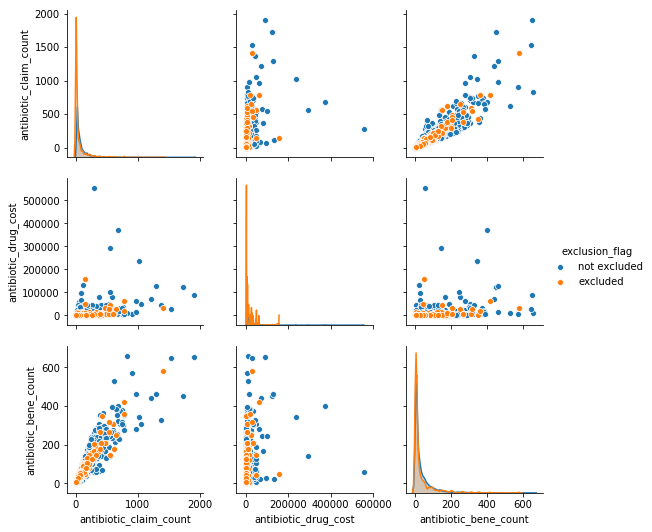

In [29]:
antibiotic_outcome = ['antibiotic_claim_count', 'antibiotic_drug_cost', 'antibiotic_bene_count', 'exclusion_flag']
g = sns.pairplot(df[antibiotic_outcome], hue='exclusion_flag')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B5E39AF48>,
      dtype=object)

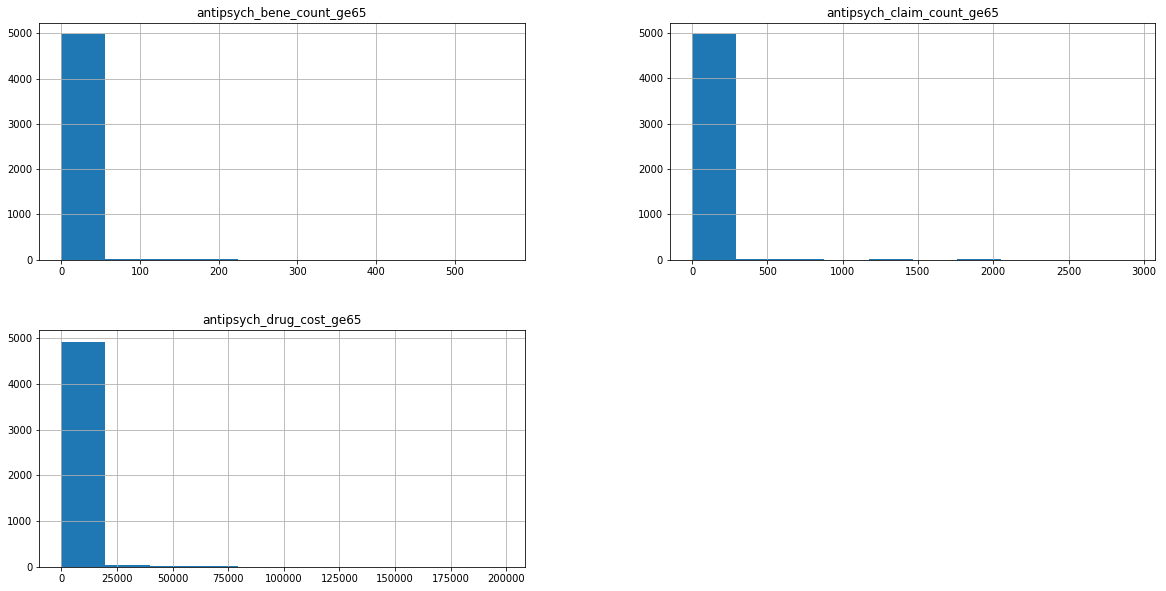

In [30]:
antipsych = ['antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65', 'antipsych_bene_count_ge65']
df[antipsych].hist(figsize=(20,10))

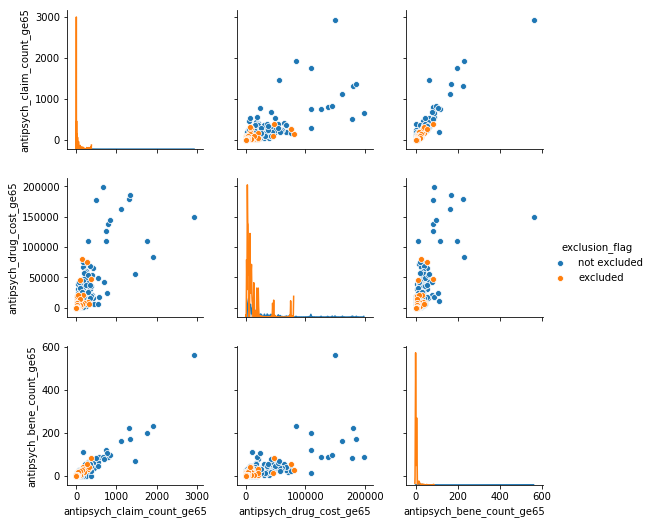

In [31]:
antipsych_outcome = ['antipsych_claim_count_ge65', 'antipsych_drug_cost_ge65', 'antipsych_bene_count_ge65', 'exclusion_flag']
g = sns.pairplot(df[antipsych_outcome], hue='exclusion_flag')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B5F06CB88>,
      dtype=object)

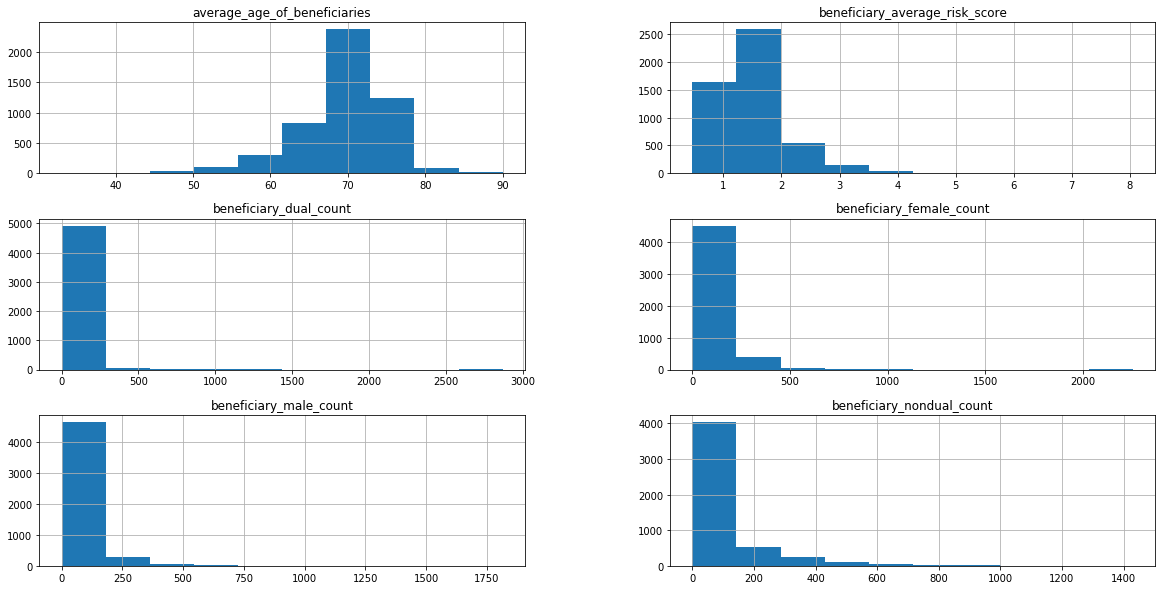

In [32]:
remain = ['average_age_of_beneficiaries', 'beneficiary_female_count', 'beneficiary_male_count', 'beneficiary_nondual_count', 'beneficiary_dual_count', 'beneficiary_average_risk_score']
df[remain].hist(figsize=(20,10))

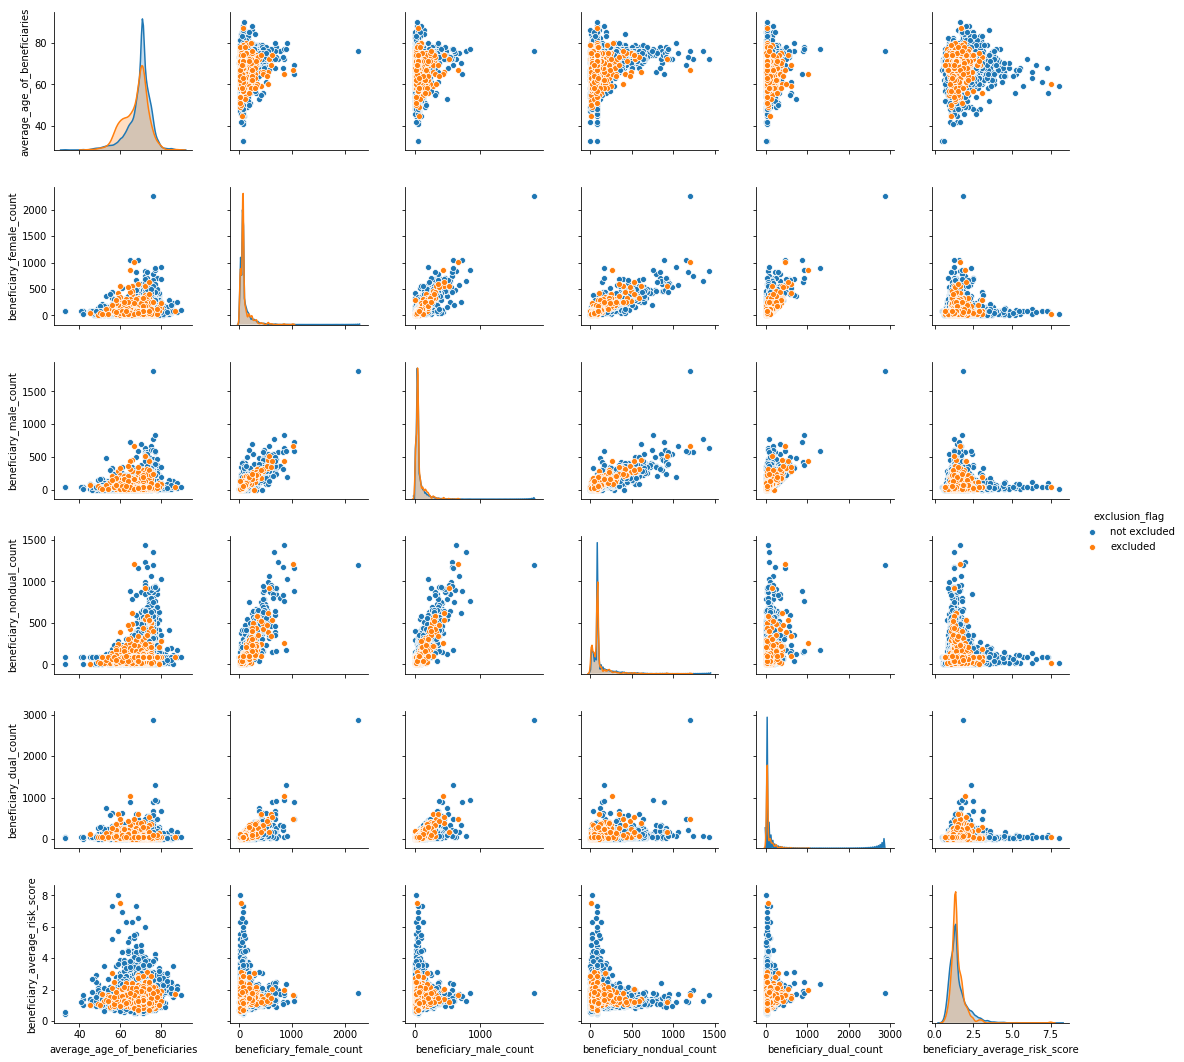

In [33]:
remain_outcome = ['average_age_of_beneficiaries', 'beneficiary_female_count', 'beneficiary_male_count', 'beneficiary_nondual_count', 'beneficiary_dual_count', 'beneficiary_average_risk_score', 'exclusion_flag']
g = sns.pairplot(df[remain_outcome], hue='exclusion_flag')
plt.show()

## Categorical Variables

Reviewing categorical variables:specialty, state, country, 

In [34]:
#Looking at the percent of each specialty that had excluded claims
df_percent = pd.crosstab(df['specialty_description'], df['exclusion_flag'],
                         normalize = 'index').rename_axis(None) 
df_percent *= 100
df_percent_sort = df_percent.sort_values(by='excluded')

Text(0.5, 1.0, 'Exclusion by Specialty')

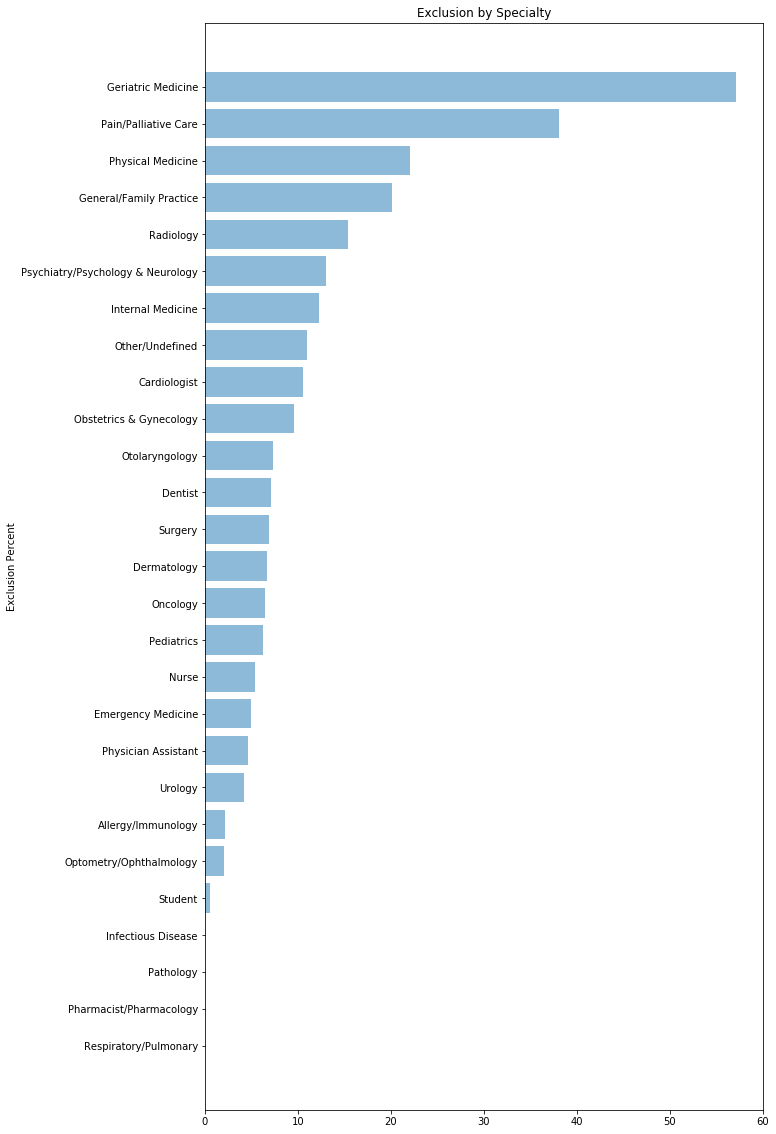

In [35]:
#Plotting exclusions from greatest to smallest by specialty
f, ax = plt.subplots(figsize=(10, 20))
ax = plt.barh(df_percent_sort.index, df_percent_sort.excluded, align='center', alpha=0.5)
plt.ylabel('Exclusion Percent')
plt.title('Exclusion by Specialty')

In [36]:
#Looking at the percent of each state that had excluded claims
df_state = pd.crosstab(df['state'], df['exclusion_flag'],
                         normalize = 'index').rename_axis(None) 
df_state *= 100
df_state_sort = df_state.sort_values(by='excluded')

Text(0.5, 1.0, 'Exclusion by State')

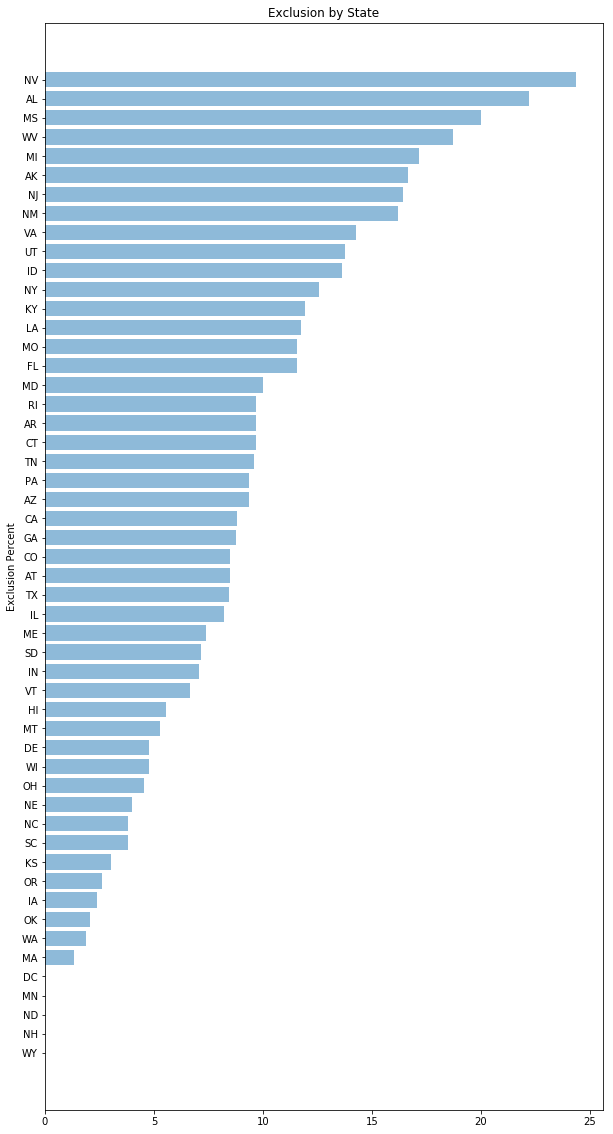

In [37]:
#Plotting exclusions from greatest to smallest by state
f, ax = plt.subplots(figsize=(10, 20))
ax = plt.barh(df_state_sort.index, df_state_sort.excluded, align='center', alpha=0.5)
plt.ylabel('Exclusion Percent')
plt.title('Exclusion by State')

In [38]:
df['country'].value_counts()

US    5000
Name: country, dtype: int64

In [39]:
#Looking at the percent of each state that had excluded claims
df_creds = pd.crosstab(df['nppes_credentials'], df['exclusion_flag'],
                         normalize = 'index').rename_axis(None) 
df_creds *= 100
df_creds_sort = df_creds.sort_values(by='excluded')

Text(0.5, 1.0, 'Exclusion by Credentials')

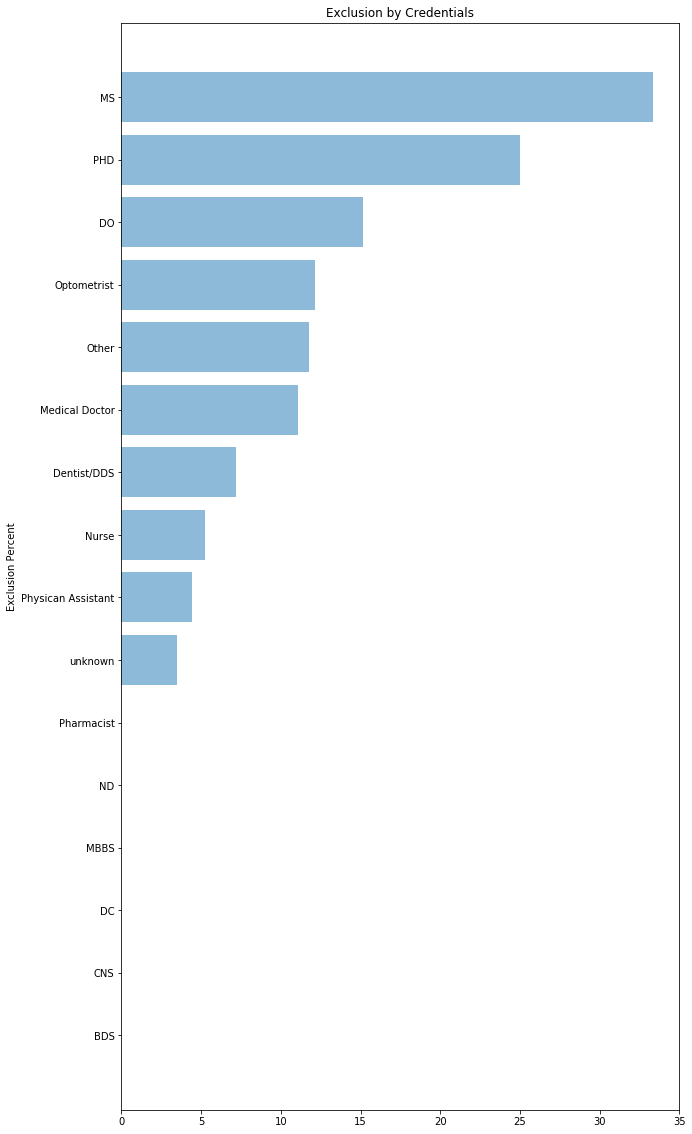

In [40]:
#Plotting exclusions from greatest to smallest by state
f, ax = plt.subplots(figsize=(10, 20))
ax = plt.barh(df_creds_sort.index, df_creds_sort.excluded, align='center', alpha=0.5)
plt.ylabel('Exclusion Percent')
plt.title('Exclusion by Credentials')

## Conclusions

According to these visualizations, will look the following variables in initial model due to seeing characteristics in their distribution that appear different in the excluded vs non excluded: day_supply_per_claim, generic_drug_cost, mapd_drug_cost, lis_drug_cost, any of the opioid and la opioid variables, and antipsych_claim_count. Will also keep in specialty, state and credentials as there seem to be a significant difference in the percentage in each of those groups. Will drop country as the sampled data are all US based.